# Building Hamiltonians

In [11]:
import json
import pennylane as qml
import pennylane.numpy as np

In [26]:
def hamiltonian(num_wires):
    """
    A function for creating the Hamiltonian in question for a general
    number of qubits.

    Args:
        num_wires (int): The number of qubits.

    Returns:
        (qml.Hamiltonian): A PennyLane Hamiltonian.
    """

    coeffs = []
    obs = []
    for j in range(num_wires):
        for i in range(num_wires):
            if i<j:
                coeffs.append(1/3)
                obs += [qml.PauliX(i) @ qml.PauliX(j)]
        coeffs.append(-1)
        obs += [qml.PauliZ(j)]
    
    return qml.Hamiltonian(coeffs, obs)

In [28]:
print(hamiltonian(3))

-1 * Z(0) + 0.3333333333333333 * (X(0) @ X(1)) + -1 * Z(1) + 0.3333333333333333 * (X(0) @ X(2)) + 0.3333333333333333 * (X(1) @ X(2)) + -1 * Z(2)


In [29]:
def expectation_value(num_wires):
    """
    Simulates the circuit in question and returns the expectation value of the 
    Hamiltonian in question.

    Args:
        num_wires (int): The number of qubits.

    Returns:
        (float): The expectation value of the Hamiltonian.
    """

    # Put your solution here #

    # Define a device using qml.device
    dev = qml.device('default.qubit', wires=num_wires)

    @qml.qnode(dev)
    def circuit(num_wires):
        """
        A quantum circuit with Hadamard gates on every qubit and that measures
        the expectation value of the Hamiltonian in question. 
        
        Args:
        	num_wires (int): The number of qubits.

		Returns:
			(float): The expectation value of the Hamiltonian.
        """

        for i in range(num_wires):
            qml.Hadamard(wires=i)

        return qml.expval(hamiltonian(num_wires))

    return circuit(num_wires)

In [ ]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    num_wires = json.loads(test_case_input)
    output = expectation_value(num_wires)

    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)

# These are the public test cases
test_cases = [
    ('8', '9.33333'),
    ('3', '1.00000')
]
# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '8'...
Correct!
Running test case 1 with input '3'...
Correct!


# Simple Trotterization
Performing trotterization without using built-in functions. The Hamiltonian is: $H = \alpha X\otimes X + \beta Z \otimes Z$

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

In [4]:
dev = qml.device('default.qubit', wires = 2)

@qml.qnode(dev)
def trotterize(alpha, beta, time, depth):
    """This quantum circuit implements the Trotterization of a Hamiltonian given by a linear combination
    of tensor products of X and Z Pauli gates.

    Args:
        alpha (float): The coefficient of the XX term in the Hamiltonian, as in the statement of the problem.
        beta (float): The coefficient of the YY term in the Hamiltonian, as in the statement of the problem.
        time (float): Time interval during which the quantum state evolves under the interactions specified by the Hamiltonian.
        depth (int): The Trotterization depth.

    Returns:
        (numpy.array): The probabilities of measuring each computational basis state.
    """
    phi_x = 2.0 * alpha * time / depth
    phi_Z = 2.0 * beta * time / depth
    for i in range(depth):
        qml.IsingXX(phi_x, wires=[0, 1])
        qml.IsingZZ(phi_Z, wires=[0, 1])

    return qml.probs(wires=[0, 1])

(<Figure size 700x300 with 1 Axes>, <Axes: >)

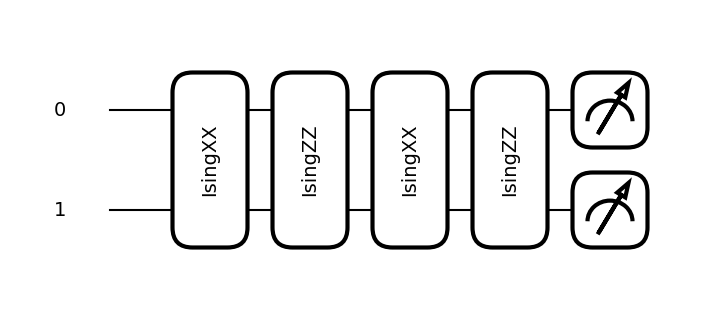

In [10]:
qml.draw_mpl(trotterize)(0.9,1.0,0.4,2)

In [5]:
trotterize(0.5,0.8,0.2,1)

array([0.99003329, 0.        , 0.        , 0.00996671])

In [6]:
trotterize(0.9,1.0,0.4,2)

array([0.87590286, 0.        , 0.        , 0.12409714])